<a href="https://colab.research.google.com/github/ghkdtjdbs/Hands-on-Machine-Learning-Study/blob/main/Chapter3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3장 : 분류

3.1 MNIST  
MNIST:그냥 관습 같은 손으로 쓴 숫자 데이터  

In [1]:
#OpeanML.org에서 MNIST데이터 내려 받는 코드
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

sklearn.datasets 패키지에 있는 함수는 대부분 세 종류  
1. fetch_openml()과 같이 실전 데이터셋을 다운로드 하기 위한 fetch_* 함수  
2. 사이킷런에 번들로 포함된 소규모 데이터셋을 로드하기 위한 load_* 함수(인터넷으로 다운로드 할 필요 없음)  
3. 테스트에 유용한 가짜 데이터셋을 생성하기 위한 make_* 함수  
생성된 데이터셋은 일반적으로 넘파이 배열이고 입력과 타깃 데이터를 담은 (X, y) 튜플로 반환 (sklearn.utils.Bunch 객체로 반환되는 데이터셋도 있음)  

- DESCR: 데이터셋 설명  
- data: 입력 데이터, 일반적으로 2D 넘파이 배열  
- target: 레이블, 일반적으로 1D 넘파이 배열  


fetch_openml() 함수는 조금 특이하게 기본적으로 입력을 판다스 데이터프레임, 레이블을 판다스 시리즈로 반환  
하지만 MNIST 데이터셋은 이미지이므로 데이터프레임이 잘 안 맞음  
따라서 as_frame=False로 지정하여 넘파이 배열로 데이터를 받음  


In [2]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [3]:
X.shape

(70000, 784)

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
y.shape

(70000,)

이미지가 70,000有  
이미지에는 784개의 특성이 있음.  
이미지가 28x28 픽셀임  
각 특성은 단순이 0(흰)부터 255(검)까지 픽셀 강도를 나타냄  
데이터셋에서 이미지 하나를 확인할거임  
샘플의 백터를 추출해서 28x28배열로 크기를 바꾸고 맷플롯립의 inshow()함수를 사용해 그리면 됨  
camp="binary"로 지정해 0을 흰색 255를 검은색으로 하는 컬러 맵을 사용  

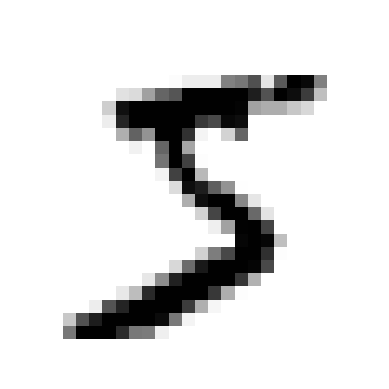

In [6]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [7]:
y[0]

'5'

실제로 데이터를 보면 분류작업이 어려움  

근데!!!!!!  
데이터를 자세히 보기 전에 테스트 세트를 만들고 따로 떼어 놓아야 함  
fetch_openml()이 반환한 데이터셋은 이미 훈련세트와 테스트 세트로 나뉘어 있음

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
#X는 대문자인데 y는 소문자인 이유 : 관례라서

훈련 세트는 이미 섞여 있어서 모든 교차 검증 폴드를 비슷하게 만듦 (하나의 폴드라도 특정 숫자가 누락되면 안 됨)  
어떤 학습 알고리즘은 훈련 샘플의 순서에 민감해서 비슷한 샘플이 연이어 나타나면 성능이 나빠짐  
근데 데이터셋을 다 섞으면 이 문제 예방 가능

3.2 이진 분류기 훈련  

문제를 단순화 해서 숫자 5만 식별한다고 하면  
5-감지기, 5와 5 아님 두개의 클래스를 구분할 수 있는 이진 분류기 사용  

In [9]:
#분류 작업을 위해 타킷 벡터를 만들어보자
y_train_5 = (y_train == '5')  # 5는 True고, 다른 숫자는 모두 False
y_test_5 = (y_test == '5')

사이킷런의 SGDClassifier클래스를 사용해 확률적 경사 하강법 분류기로 시작해보자  
이 분류기의 장이킷런의 SGDClassifier클래스를 사용해 확률적 경사 하강법 분류기로 시작해보자  
이 분류기의 장점은 매우 큰 데이터셋을 효율적으로 처리할 수 있다.  
SGD는 한 번에 하나씩 훈련 샘플을 독립적으로 처리할 수 있음 (그래서 온라인 학습에 맞음)

In [ ]:
#SGDClassifier 모델을 만들고 전체 훈련 세트를 사용해 훈련 시키기

from sklearn.linear_model import SGDClassifier

# 모델 생성 (결과 재현을 위해 random_state 설정)
sgd_clf = SGDClassifier(random_state=42)
# 모델 훈련
sgd_clf.fit(X_train, y_train_5)

In [ ]:
#이 코드ㅡㄹ 사용해 숫자 5의 이미지 감지 하기
sgd_clf.predict([some_digit])

3.3 성능 측정  
:분류기 평가는 회귀모델보다 어렵다.  

3.2.1 교차 검증을 사용한 정확도 측정  

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import import clone

# 3개의 폴드로 나누는 StratifiedKFold 설정
skfolds = StratifiedKFold(n_splits=3) # 데이터셋이 미리 섞여 있지 않다면 shuffle=True를 추가하세요.(책)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    # 모델 복제
    clone_clf = clone(sgd_clf)

    # 훈련 세트와 테스트 세트 구성
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    # 복제된 모델 훈련 및 예측
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)

    # 정확도 계산 및 출력
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))